# Introduction

# Statistical Learning

# Linear Regression

# Classification

# Re-sampling Methods

## Cross-Validation

### Validation Set Approach

### Leave-one-out cross-validation

### k-Fold Cross-validation

### Bias-Variance Trade-Off for k-fold Cross-Validation

### Cross-Validation on Classification Problems

## The Bootstrap

In [132]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import random
random.seed(1)
%matplotlib inline
pd.options.display.max_rows = 9999999

py.init_notebook_mode(connected=True)

def get_mape(predictions, y):
    ape = []
    for p_i,y_i in zip(predictions, y):
        #print(p_i, y_i)
        t = abs(p_i-y_i)/p_i
        ape.append(t)

    mape = np.mean(ape)
    return mape



## Lab

### Validation Set Approach

In [23]:
auto_data = pd.read_csv("../data/Auto.csv")
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [40]:
auto_data["horsepower"] = pd.to_numeric(auto_data["horsepower"], errors="coerce")
auto_data["horsepower^2"] = auto_data["horsepower"] * auto_data["horsepower"]
auto_data["horsepower^3"] = auto_data["horsepower"] * auto_data["horsepower"] * auto_data["horsepower"]

In [45]:
df = auto_data
traces = []
traces.append(go.Scatter(x=df["horsepower"], 
                         y=df["mpg"], 
                         mode="markers"))
#layout = go.Layout(barmode='overlay', width=800, height=800)
fig = go.Figure(data=traces)

py.iplot(fig)

Text(0.5,0.98,u'MPG Distribution')

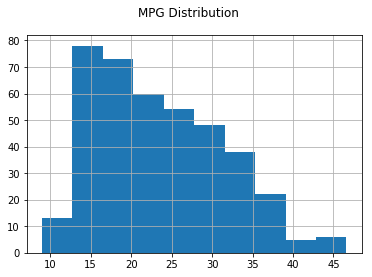

In [67]:
auto_data["mpg"].hist()

plt.gcf().suptitle("MPG Distribution")

Text(0.5,0.98,u'Horse Power Distribution')

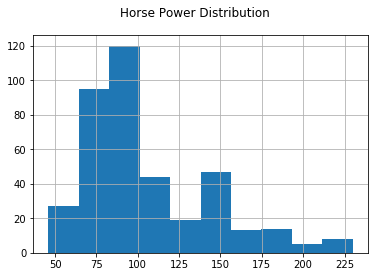

In [66]:
auto_data["horsepower"].hist()
plt.gcf().suptitle("Horse Power Distribution")


In [75]:
auto_data.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
horsepower^2    float64
horsepower^3    float64
dtype: object

(79, 11)

(318, 11)

0.19899244332493704

In [109]:
data = auto_data
train, test = train_test_split(data,test_size=0.8)

X = train.fillna(0)["horsepower"]
y = train["mpg"]
X = sm.add_constant(X)
# Note the difference in argument order
sm_model = sm.OLS(y,X).fit()

# make the predictions by the model
in_sample_preds = sm_model.predict(X) 

# print out the statistics
display(sm_model.summary())
#display(sm_model.conf_int(alpha=0.05))
display(print_mape(in_sample_preds, y))
X = test.fillna(0)["horsepower"]
X = sm.add_constant(X)
out_of_sample_preds = sm_model.predict(X) 
y = test["mpg"]
display(print_mape(out_of_sample_preds, y))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     96.53
Date:                Sun, 25 Feb 2018   Prob (F-statistic):           3.12e-15
Time:                        00:30:26   Log-Likelihood:                -248.11
No. Observations:                  79   AIC:                             500.2
Df Residuals:                      77   BIC:                             505.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0145      1.763     22.696      0.000      36.504      43.525
horsepower    -0.1560      0.016     -9.825      0.000      -0.188      -0.124
==============================================================================
Omnibus:                        3.833   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.741
Skew:                           0.524   Prob(JB):                        0.154
Kurtosis:                       2.807   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'MAPE is 22.8040%'

'MAPE is 17.6915%'

In [149]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

('TRAIN:', array([1]), 'TEST:', array([0]))
(array([[3, 4]]), array([[1, 2]]), array([2]), array([1]))
('TRAIN:', array([0]), 'TEST:', array([1]))
(array([[1, 2]]), array([[3, 4]]), array([1]), array([2]))


In [148]:
auto_data.shape

(397, 11)

In [159]:
data = auto_data
X = auto_data.fillna(0)["horsepower"]
y = auto_data["mpg"]

in_sample_err = []
oo_sample_err = []

for train_index, test_index in loo.split(X):
    #print(np.count_nonzero(train_index), np.count_nonzero(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.fillna(0)[train_index], y.fillna(0)[test_index]
    X_train = sm.add_constant(X_train)
    sm_model = sm.OLS(y_train,X_train).fit()

    # make the predictions by the model
    in_sample_preds = sm_model.predict(X_train) 
    
    try:
        X_test = sm.add_constant(X_test)
        oo_sample_preds = sm_model.predict(X_test) 
        
    except Exception as e:
        #print(e)
        continue
    in_sample_err.append(get_mape(in_sample_preds, y_train))
    oo_sample_err.append(get_mape(oo_sample_preds, y_test))
    #print("Te",print_mape(oo_sample_preds, y_train))
    
traces = []
traces.append(go.Scatter(x=in_sample_err, y=oo_sample_err, opacity=1, mode="markers"))

layout = go.Layout(barmode='overlay', width=800, height=800)
fig = go.Figure(data=traces, layout=layout)

py.iplot(fig)

In [160]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, LinearRegression
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)b
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
num_instances = len(X)
loocv = model_selection.LeaveOneOut()
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.823% (42.196%)


In [165]:
print(X.shape, Y.shape)

((768, 8), (768,))


In [171]:
from sklearn.linear_model import LogisticRegression, LinearRegression
X = auto_data.fillna(0)["horsepower"]
y = auto_data["mpg"]
X = sm.add_constant(X)
model = LinearRegression()
results = model_selection.cross_val_score(model, X, y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 0.000% (0.000%)


In [175]:
from sklearn.utils import resample

In [174]:
portfolio = pd.read_csv("../data/Portfolio.csv")

In [192]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    print(resample_i.shape)
    
    X_resample = X[resample_i]
    return X_resample
X = portfolio["X"].values
X_resample = bootstrap_resample(X, n=10000)

print 'original mean:', X.mean(), np.std(X)
print 'resampled mean:', X_resample.mean(), X_resample.std()

(10000,)
original mean: -0.077132108211121 1.0570505827711292
resampled mean: -0.07113277891426009 1.063051459589694


# Linear Model Selection and Regularization

# Moving Beyond Linearity

# Tree-based methods

# Support Vector Machines

# Unsupervised Learning